<a href="https://github.com/thalesvalente/specializations/blob/main/data-analysis-improvement/module-1-python-for-data-analysis/unit-3-data-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Python para Ciência de Dados

Olá, estudante!

Você está quase concluindo esta primeira etapa rumo à sua transformação em cientista de dados. Você começou explorando um novo modo de pensar, possibilitando a evolução dos cliques para os scripts. Por meio de exemplos, você viu como essa mudança de mentalidade pode abrir inúmeras possibilidades e aumentar significativamente sua produtividade. Embora a habilidade de escrever códigos não seja obrigatória para se tornar um cientista de dados, o caminho se torna muito mais desafiador sem essa competência. Na primeira unidade, você teve a oportunidade de experimentar como as linguagens de programação podem ser mais produtivas em comparação ao uso de interfaces gráficas.

Na segunda unidade, você foi apresentado a algumas bibliotecas essenciais no ecossistema Python, como NumPy e Pandas, explorou diversas funcionalidades delas com exemplos práticos e aprendeu a ler e visualizar dados por meio de tabelas e gráficos.

Para consolidar o que você aprendeu nas unidades anteriores, nesta vamos trabalhar com um estudo de caso que trará uma visão prática do processo de carregamento e análise de dados reais — que poderão ser utilizados no seu dia a dia como analista de dados. Ao contrário dos dados bem comportados, que são frequentemente usados em livros e cursos para tratar de conceitos fundamentais, aqui serão apresentados dados mais desafiadores e realistas.

Bons estudos!

2. Contexto 

Imagine que você seja um discente, docente ou técnico administrativo da Universidade Federal do Maranhão e, por isso, tem interesse em explorar os dados disponíveis no Portal de Dados Abertos dessa instituição: [Portal de Dados Abertos]
Esses portais têm sido criados em diversas universidades brasileiras em resposta ao Decreto n. 8777 de maio de 2016, que definiu que todos os órgãos e entidades da administração pública federal precisariam publicar seus dados em formato aberto. Eles precisam ser disponibilizados para o público de maneira acessível, utilizável e distribuível, sem restrições de direitos autorais, patentes ou outros mecanismos de controle, além de estar em formatos que podem ser facilmente processados por computadores. [Decreto 8777/16]

Você terá acesso a diversos dados e informações, inclusive o dicionário de dados, que traz algumas informações sobre os dados, como por exemplo, quais campos (colunas) existem, seus tipos e sua descrição, como ilustrado na tabela a seguir:

| Campo     | Tipo | Descrição                          | Obrigatório? |
|-----------|------|------------------------------------|--------------|
| Nome      | Texto| Nome do docente                    | Sim          |
| Unidade   | Texto| Nome do setor de trabalho do docente | Sim        |
| Sexo      | Texto| Sexo do docente                    | Sim          |
| Titulação | Texto| Titulação do docente               | Sim          |

Qual é a quantidade de docentes e técnicos administrativos por unidade, sexo e titulação? A partir dos dados, seremos capazes de responder perguntas, como essa. Vamos analisar esses dados?


Inicie a análise dos dados criando um Notebook no Google Colab, renomeando-o como Python em Ação. O primeiro passo é criar uma célula de texto. Nas células de texto, utilizamos uma linguagem de marcação usada para formatar texto denominada de Markdown. Para adicionar títulos em Markdown, usaremos o símbolo de cerquilha (#). O número de cerquilhas indica o nível do título, variando de 1 a 6. Neste caso, estaremos criando um título de nível 1. 

- **Passos**
    - Neste exemplo, utilize como título o nome desta unidade: `# Python em Ação`
    - Em seguida, podemos criar uma célula com um subtítulo (nível 2), referente a esta seção: `## Analisando os dados sobre os servidores da UFMA`
    - Para a análise, utilize a biblioteca `Pandas`, introduzida na Unidade 2. Com ela, é possível limpar, manipular, analisar e visualizar os dados. Então, vamos  adicione-a à sua primeira célula de código, por meio da qual você irá importar a biblioteca Pandas e apelide-a de pd.
    - Volte ao portal de dados abertos, selecione a  URL  dos dados mais recentes, que neste caso são de 2020. Esse conjunto de dados inclui informações sobre os docentes que já faziam parte da instituição até a data de geração dos dados. Crie uma célula na qual vamos definir uma variável para armazenar essa URL.

Observe que os dados estão disponíveis no formato `CSV` (Comma-Separated Values). Esse é um formato de arquivo usado para armazenar dados tabulares, como em uma planilha ou banco de dados, em texto simples. A biblioteca Pandas disponibiliza a função `read_csv( )` para carregar dados nesse formato.

A função `read_csv( )` considera, por padrão, que o arquivo lido tem a vírgula como separador. Quando isso não acontece, é necessário especificar qual caractere deve ser usado na função. Você pode voltar à célula que apresentou o erro e adicionar o parâmetro `sep`, ou seja, o separador. Então, podemos tentar visualizar as 5 primeiras linhas usando o método `.head( )`:

In [11]:
import pandas as pd

url_2020 = 'http://dadosabertos.ufma.br/dataset/334d89c8-629f-49c5-aa06-171e35c1d33b/resource/55a2d103-d73b-449e-85bc-655df7dfc45a/download/docentes_-_2020.csv'
df = pd.read_csv(url_2020, sep=";")
df.head()

,nome,unidade,sexo,titulacao,Unnamed: 4
0,ALANA DAS CHAGAS FERREIRA AGUIAR,DEPARTAMENTO DE BIOLOGIA/CCBS,F,DOUTORADO,NaN
1,FREDERICO FERNANDO SOUZA SILVA,DEPARTAMENTO DE ARTES VISUAIS/CCH,M,DOUTORADO,NaN
2,ANDREA MARQUES DA SILVA PIRES,DEPARTAMENTO DE PATOLOGIA/CCBS,F,DOUTORADO,NaN
3,SARA FITERMAN LIMA,COORDENACAO DO CURSO DE MEDICINA PINHEIRO/CCHNST,F,DOUTORADO,NaN
4,ABIMAELSON SANTOS PEREIRA,DEPARTAMENTO DE ARTES CENICAS/CCH,M,MESTRADO,NaN


Você poderá observar que existe um ponto e vírgula `;` no final de cada linha. Isso significa que ao encontrar esse separador, a função `read_csv( )` entendeu que existiria mais uma coluna. 

Como não havia dados, a função criou uma coluna sem nome `(Unnamed)` e os valores da coluna foram interpretados como `NaN` (Not a Number).
- `NaN` é um valor especial usado para representar valores que são indefinidos ou não representáveis como números.

Podemos resolver esse problema de duas maneiras:
1. Removendo a coluna através do método `.drop()`:
2. Ao invés de remover a coluna, evitar que a função `read_csv()` crie essa coluna. Para isso, basta explicitar quais colunas queremos que sejam carregadas, através do parâmetro `usecols`. Para este parâmetro, podemos passar uma lista com os nomes das colunas que desejamos:


In [12]:
# Método 1 para remoção da coluna NaN
df.drop("Unnamed: 4", axis=1, inplace=True)
df.head()
# Método 2 para remoção da coluna NaN
# colunas = ['nome', 'unidade', 'sexo', 'titulacao']
# df = pd.read_csv(url_2020, sep=";", usecols=colunas)

,nome,unidade,sexo,titulacao
0,ALANA DAS CHAGAS FERREIRA AGUIAR,DEPARTAMENTO DE BIOLOGIA/CCBS,F,DOUTORADO
1,FREDERICO FERNANDO SOUZA SILVA,DEPARTAMENTO DE ARTES VISUAIS/CCH,M,DOUTORADO
2,ANDREA MARQUES DA SILVA PIRES,DEPARTAMENTO DE PATOLOGIA/CCBS,F,DOUTORADO
3,SARA FITERMAN LIMA,COORDENACAO DO CURSO DE MEDICINA PINHEIRO/CCHNST,F,DOUTORADO
4,ABIMAELSON SANTOS PEREIRA,DEPARTAMENTO DE ARTES CENICAS/CCH,M,MESTRADO


A partir disso, é possível perceber que a segunda opção tem a vantagem de não carregar dados desnecessários para a memória do computador. Como você observou, pelo dicionário de dados, todos os campos são do tipo texto (string), porém, é sempre importante garantir que os tipos foram interpretados corretamente no carregamento dos dados. Para isso, usaremos o método `info()`. Observe o resultado:

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863 entries, 0 to 1862
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   nome       1863 non-null   object
 1   unidade    1863 non-null   object
 2   sexo       1863 non-null   object
 3   titulacao  1863 non-null   object
dtypes: object(4)
memory usage: 58.3+ KB


A biblioteca `Pandas` utiliza as estruturas de dados da biblioteca `NumPy`, logo, os mesmos tipos de dados (`Dtype`) e os textos (`strings`) são carregados como object, c como é possível observar na saída do método `info()`.  Nesse caso, os dados foram carregados com os tipos esperados, portanto, você pode seguir com as análises;

Primeiro, analise a quantidade de docentes por unidade, listando as 10 unidades que possuem a maior quantidade de docentes. De modo geral, você vai precisar escrever o seguinte algoritmo:
    - Para cada unidade, contar os docentes que est'ao vinculados a ela;
    - Ordenar as unidades pela quantidade de docentes de modo decrescente (,aior para o menor valor);
    - Apresentar as 10 primeiras unidades com a quantidade de docentes

Com a biblioteca Pandas, esses passos podem ser definidos em uma única linha. Observe que os passos estão sendo executados utilizando o encadeamento de métodos apresentado na Unidade 2.

In [14]:
df.unidade.value_counts().sort_values(ascending=False).head(10)

unidade
COLEGIO UNIVERSITARIO                                81
COORDENACAO DO CURSO DE MEDICINA IMPERATRIZ/CCSST    60
COORDENACAO DO CURSO DE MEDICINA PINHEIRO/CCHNST     57
DEPARTAMENTO DE LETRAS/CCH                           47
DEPARTAMENTO DE MEDICINA I/CCBS                      45
DEPARTAMENTO DE DIREITO/CCSO                         44
COORDENACAO DO CURSO DE CIENCIA E TECNOLOGIA/CCET    41
DEPARTAMENTO DE EDUCACAO II/CCSO                     40
DEPARTAMENTO DE COMUNICACAO SOCIAL/CCSO              40
DEPARTAMENTO DE CIENCIAS FISIOLOGICAS/CCBS           40
Name: count, dtype: int64

A grande quantidade de unidades dificulta a visualização por meio de um gráfico em linhas. Neste caso, um gráfico de barras pode facilitar a leitura dos dados. Para isso, você precisará seguir os seguintes passos:

- Para cada titulação, contar os docentes que estão vinculados a ela;
- Para cada titulação, calcular o seu percentual no total;
- Criar um gráfico de barras com esse percentual por titulação.
- Novamente, todos esses passos podem ser realizados em uma única linha de código.

<Axes: xlabel='titulacao'>

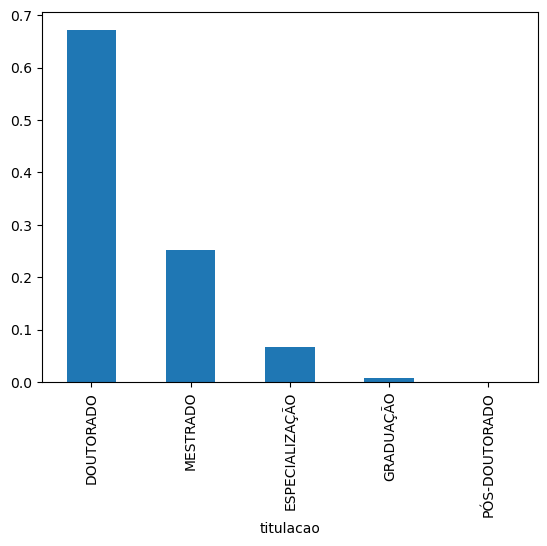

In [15]:
df['titulacao'].value_counts(normalize=True).plot(kind='bar')

Observe que no gráfico aparece a titulação “pós-doutorado”, contudo, esse não é um título acadêmico; a maior titulação existente é o “doutorado”. Esse é um exemplo de erro no dado, algo com que será necessário lidar no dia a dia. Primeiramente, podemos investigar melhor e verificar quantos docentes possuem esse valor na titulação. 

In [17]:
df[df['titulacao'] == 'PÓS-DOUTORADO']

,nome,unidade,sexo,titulacao
245,EMILIE GENEVIEVE AUDIGIER,DEPARTAMENTO DE LETRAS/CCH,F,PÓS-DOUTORADO


Como essa consulta retornou apenas uma docente e já que sabemos que a titulação máxima é “doutorado”, logo podemos corrigir a informação dessa docente (245), mudando sua titulação para 'DOUTORADO'. Então podemos agora visualizar o gráfico novamente.

<Axes: xlabel='titulacao'>

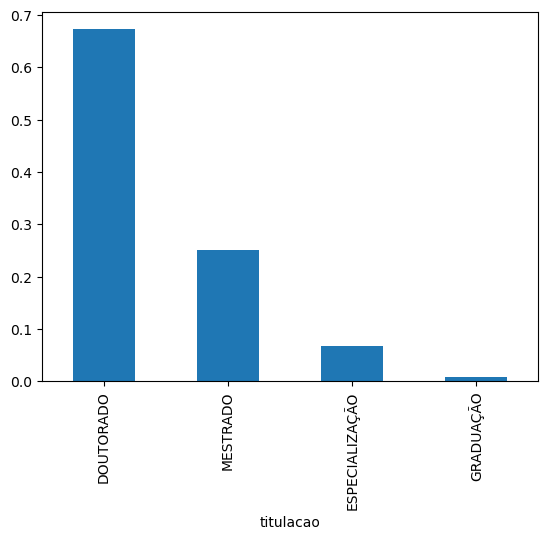

In [18]:
df.loc[245].titulacao = 'DOUTORADO'
df['titulacao'].value_counts(normalize=True).plot(kind='bar')

Adicionalmente, podemos analisar a quantidade de docentes por sexo e titulação. Nesse caso, vamos analisar duas informações em conjunto para ter uma melhor visão. Pode ser que tenhamos mais docentes do sexo masculino do que feminino ou que os docentes do sexo feminino possuam maior titulação.
- Obs: Para problemas como esse, existe uma variação do gráfico de barras tradicional: o gráfico de barras empilhadas. Esse método permite visualizar a composição de diferentes categorias dentro de cada barra, contendo várias séries empilhadas umas sobre as outras, em vez de conter apenas uma série de dados por barra. Cada segmento da barra representa uma parte da totalidade, ajudando a mostrar tanto os totais quanto a contribuição de cada categoria para esses totais.

Novamente, temos dados categóricos e iremos realizar contagens. A diferença é que iremos contar as combinações de 'sexo' e 'titulacao'. Em alto nível, temos os seguintes passos
1. Para cada sexo e titulação, contar a quantidade de docentes; 
2. Gerar o gráfico de barras empilhadas.  
  
Para criar um gráfico de barras empilhadas, utilizamos o método `plot` do Pandas com `kind='bar'` e `stacked=True`. Contudo, a saída do value_counts não está no formato adequado para o gráfico de barras empilhadas, por isso será necessário utilizarmos o `unstack` para organizar os dados previamente.

<Axes: xlabel='sexo'>

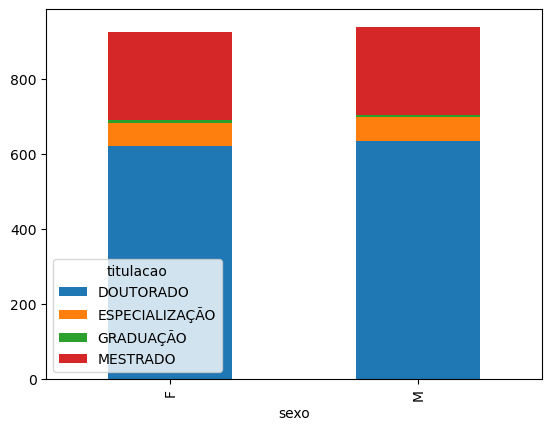

In [19]:
df.value_counts(['sexo', 'titulacao']).unstack().plot(kind='bar', stacked=True)

**Lembre-se de que um dos pilares do pensamento computacional é o reconhecimento de padrões e que já contamos a quantidade de docentes por unidade.**
Então, vamos listar as 10 unidades com mais docentes do sexo masculino e repetir o procedimento para o sexo feminino. A diferença agora é que iremos filtrar os docentes pelo sexo, seguindo os seguintes passos:

1. Filtrar os docentes do sexo masculino (e/ou feminino);
2. Para cada unidade, contar os docentes que estão vinculados a ela;
3. Ordenar as unidades pela quantidade de docentes de modo decrescente (do maior para o menor valor);
4. Apresentar as 10 primeiras unidades com a quantidade de docentes.  
  
Neste exemplo, iremos salvar alguns resultados intermediários. Para os passos 1 e 2, iremos salvar em duas variáveis, uma irá armazenar os dados dos docentes do sexo masculino; e a outra os do sexo feminino:


In [20]:
docentes_masculino = df.query("sexo=='M'").unidade.value_counts()
docentes_feminino = df.query("sexo=='F'").unidade.value_counts()

O conjunto de dados dos técnicos administrativos possui os mesmos campos. Acesse a página com estes dados e realize as mesmas analises que fizemos para os docentes. Fique à vontade para fazer outras.

https://dadosabertos.ufma.br/dataset/tecnicos-administrativos

# 2. Analisando os dados dos alunos ingressantes

Semelhante ao que fizemos na coleção dos dados dos docentes, vamos olhar o dicionário de dados. Observe que agora temos muito mais colunas do que tínhamos nos dados dos docentes.

| Índice | Campo          | Tipo    | Descrição                                                | Obrigatório? |
|--------|----------------|---------|----------------------------------------------------------|--------------|
| 1      | Município      | Texto   | Município do curso                                       | Sim          |
| 2      | Curso          | Texto   | Nome do curso                                            | Sim          |
| 3      | Grau           | Texto   | Grau acadêmico do curso (Bacharelado/Tecnólogo)          | Sim          |
| 4      | Turno          | Texto   | Horário de funcionamento do curso                        | Sim          |
| 5      | Modalidade     | Texto   | Tipo de ensino (presencial, a distância, semipresencial) | Sim          |
| 6      | Nível          | Texto   | Nível de ensino                                          | Sim          |
| 7      | Habilitações   | Texto   | Habilitações do curso                                    | Não          |
| 8      | Conveniências  | Texto   | Conveniências do curso                                   | Não          |
| 9      | Forma Ingresso | Texto   | Forma de ingresso do discente                            | Sim          |
| 10     | Ano            | Inteiro | Ano da informação                                        | Sim          |
| 11     | Período        | Inteiro | Semestre letivo da informação                            | Sim          |
| 12     | Quantidade     | Inteiro | Quantidade de alunos que ingressaram em um curso no ano e período relatado | Sim |


No portal de dados abertos da UFMA, é disponibilizada uma coleção com os dados de ingressantes por semestre, que pode ser acessada no seguinte endereço:

https://dadosabertos.ufma.br/dataset/alunos-ingressantes-2017-1

Qual é a média de ingressantes de cada curso da Universidade Federal do Maranhão? Quais cursos têm as maiores e menores médias? Com desses dados, podemos responder essas perguntas. Para cada semestre, são disponibilizados os dados de ingressantes em um arquivo CSV. Para sabermos a média de ingressantes, teremos que utilizar vários arquivos, mas antes de atacar o problema como um todo, vamos decompô-lo e calcular a média para um semestre apenas.

**Lembre-se de que a decomposição é um dos pilares do pensamento computacional.**

Inicialmente, vamos criar uma célula de texto com o subtítulo desta seção: `# Analisando os dados dos alunos ingressantes`
Obs: Observe que agora podemos ocultar todas as células de código da análise anterior para focarmos nessa nova análise. Tente você mesmo!
- E importar a biblioteca Pandas:
- Vamos criar uma variável para armazenar o endereço do conjunto de dados dos ingressantes do segundo semestre de 2018
- Então, podemos carregar os dados, passando diretamente a URL para a função `read_csv()`:
- Com os dados carregados, é interessante verificar as 5 primeiras linhas

Assim como aconteceu com os dados dos docentes, será criada uma coluna adicional devido ao ponto e vírgula (;) no final de cada linha. Você já sabe como corrigir isso, certo?

In [32]:
import pandas as pd

url_2018 ='http://dadosabertos.ufma.br/dataset/36d814e1-baa0-466c-86d8-73714c076755/resource/94c390a1-af05-49df-a42c-de11f1187999/download/alunos_ingressantes_-_2018.1.csv'
df_disc_2018 = pd.read_csv(url_2018, sep=";")
df_disc_2018.head()

,municipio,curso,grau,turno,modalidade,nivel,habilitacao,convenio,forma_ingresso,ano,periodo,quantidade,Unnamed: 12
0,BACABAL,LETRAS - PORTUGUÊS,LICENCIATURA,Vespertino,Presencial,G,NaN,NaN,SISU - AMPLA CONCORRÊNCIA,2018,1,24,NaN
1,BACABAL,LETRAS - PORTUGUÊS,LICENCIATURA,Vespertino,Presencial,G,NaN,NaN,SISU - ESCOLA PÚBLICA,2018,1,2,NaN
2,BACABAL,LETRAS - PORTUGUÊS,LICENCIATURA,Vespertino,Presencial,G,NaN,NaN,SISU - ESCOLA PUBLICA - DEFICIENTE - RF,2018,1,1,NaN
3,BACABAL,LETRAS - PORTUGUÊS,LICENCIATURA,Vespertino,Presencial,G,NaN,NaN,SISU - ESCOLA PUBLICA - NEGRO,2018,1,10,NaN
4,BACABAL,LETRAS - PORTUGUÊS,LICENCIATURA,Vespertino,Presencial,G,NaN,NaN,SISU - ESCOLA PUBLICA - NEGRO - DEFICIENTE - RF,2018,1,1,NaN


In [33]:
df_disc_2018.drop("Unnamed: 12", axis=1, inplace=True)
df_disc_2018.head()

,municipio,curso,grau,turno,modalidade,nivel,habilitacao,convenio,forma_ingresso,ano,periodo,quantidade
0,BACABAL,LETRAS - PORTUGUÊS,LICENCIATURA,Vespertino,Presencial,G,NaN,NaN,SISU - AMPLA CONCORRÊNCIA,2018,1,24
1,BACABAL,LETRAS - PORTUGUÊS,LICENCIATURA,Vespertino,Presencial,G,NaN,NaN,SISU - ESCOLA PÚBLICA,2018,1,2
2,BACABAL,LETRAS - PORTUGUÊS,LICENCIATURA,Vespertino,Presencial,G,NaN,NaN,SISU - ESCOLA PUBLICA - DEFICIENTE - RF,2018,1,1
3,BACABAL,LETRAS - PORTUGUÊS,LICENCIATURA,Vespertino,Presencial,G,NaN,NaN,SISU - ESCOLA PUBLICA - NEGRO,2018,1,10
4,BACABAL,LETRAS - PORTUGUÊS,LICENCIATURA,Vespertino,Presencial,G,NaN,NaN,SISU - ESCOLA PUBLICA - NEGRO - DEFICIENTE - RF,2018,1,1


Use o método '`info()` para fazer checagem do tipo de dados. Você verificará que os tipos de dados foram carregados corretamente, com exceção das colunas "habilitação" e "convênio". Enquanto as outras colunas têm 417 valores, as colunas "habilitação" e "convênio" têm zero (0) valores não nulos. Talvez essas colunas tenham valores em outros semestres, mas, como não vamos precisar desses dados, é melhor não incluí-las no carregamento. 

Como precisamos passar os nomes das colunas como parâmetro no carregamento, vamos primeiro imprimir as colunas atuais e criar uma lista com apenas as colunas que vamos carregar. Em uma célula do Jupyter Notebook, digite: `df_disc_2028.columns`. Ao executar, serão impressas todas as colunas atuais:

In [34]:
df_disc_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   municipio       417 non-null    object 
 1   curso           417 non-null    object 
 2   grau            417 non-null    object 
 3   turno           417 non-null    object 
 4   modalidade      417 non-null    object 
 5   nivel           417 non-null    object 
 6   habilitacao     0 non-null      float64
 7   convenio        0 non-null      float64
 8   forma_ingresso  417 non-null    object 
 9   ano             417 non-null    int64  
 10  periodo         417 non-null    int64  
 11  quantidade      417 non-null    int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 39.2+ KB


In [35]:
df_disc_2018.columns

Index(['municipio', 'curso', 'grau', 'turno', 'modalidade', 'nivel',
       'habilitacao', 'convenio', 'forma_ingresso', 'ano', 'periodo',
       'quantidade'],
      dtype='object')

- Vamos criar uma lista manualmente, ou seja, vamos copiar apenas as colunas que desejamos para uma nova variável do tipo lista
- A lista criada será passada para a função através do parâmetro `usecols`
- Vamos visualizar novamente os dados, porém ordenando os cursos pela quantidade de ingressantes:

In [86]:
colunas = ['municipio', 'curso', 'grau', 'turno', 'modalidade', 'nivel',
       'forma_ingresso', 'ano', 'periodo',
       'quantidade']
df_disc_2018 = pd.read_csv(url_2018, sep=";", usecols=colunas)
df_disc_2018.sort_values(by='quantidade', ascending=True)

,municipio,curso,grau,turno,modalidade,nivel,forma_ingresso,ano,periodo,quantidade
385,SÃO LUÍS,QUÍMICA,BACHARELADO,Vespertino,Presencial,G,SISU - ESCOLA PUBLICA - NEGRO - RF,2018,1,1
258,SÃO LUÍS,FARMÁCIA,BACHARELADO,Matutino e Vespertino,Presencial,G,SISU - ESCOLA PUBLICA - INDIO - RF,2018,1,1
255,SÃO LUÍS,ESTUDOS AFRICANOS E AFRO-BRASILEIROS,LICENCIATURA,Noturno,Presencial,G,SISU - ESCOLA PUBLICA - RF,2018,1,1
109,SÃO LUÍS,CIÊNCIA DA COMPUTAÇÃO,BACHARELADO,Vespertino,Presencial,G,SISU - ESCOLA PÚBLICA,2018,1,1
110,SÃO LUÍS,CIÊNCIA DA COMPUTAÇÃO,BACHARELADO,Vespertino,Presencial,G,SISU - ESCOLA PUBLICA - INDIO - RF,2018,1,1
...,...,...,...,...,...,...,...,...,...,...
330,SÃO LUÍS,MEDICINA,BACHARELADO,Matutino e Vespertino,Presencial,G,SISU - AMPLA CONCORRÊNCIA,2018,1,25
20,CHAPADINHA,ENGENHARIA AGRÍCOLA,BACHARELADO,Matutino e Vespertino,Presencial,G,SISU - AMPLA CONCORRÊNCIA,2018,1,27
231,SÃO LUÍS,ENGENHARIA CIVIL,BACHARELADO,"Matutino, Vespertino e Noturno",Presencial,G,REINGRESSO SEGUNDO CICLO,2018,1,36
124,SÃO LUÍS,CIÊNCIA E TECNOLOGIA,BACHARELADO,Noturno,Presencial,G,SISU - AMPLA CONCORRÊNCIA,2018,1,44


Para determinar os 10 cursos com a maior quantidade de ingressantes, precisaremos elaborar um algoritmo com os seguintes passos:

1. Agrupar as diferentes formas de ingresso por curso;
2. Funções matemáticas somar a quantidade de ingressantes de todas as formas de ingresso de cada curso;
3. Ordenar de modo decrescente;
4. Listar os 10 primeiros.

Por uma questão didática, o código a seguir explicita esses 4 passos em 4 linhas distintas. Para isso, foi utilizada a barra `‘\’` para permitir dividir o encadeamento em várias linhas. 

In [87]:
df_disc_2018.groupby('curso')['quantidade']\
    .sum()\
        .sort_values(ascending=False)\
            .head(10)

curso
CIÊNCIA E TECNOLOGIA               195
DIREITO                            123
MEDICINA                           109
PEDAGOGIA                          105
ENFERMAGEM                          92
CIÊNCIAS BIOLÓGICAS                 77
EDUCAÇÃO FÍSICA                     76
COMUNICAÇÃO SOCIAL - JORNALISMO     60
LETRAS - PORTUGUÊS                  47
ADMINISTRAÇÃO                       45
Name: quantidade, dtype: int64

Existem cursos ofertados em mais de um turno e município. Para distinguir esses ingressantes, precisamos agrupar por curso, município e turno.

In [88]:
df_disc_2018.groupby(['curso', 'municipio', 'turno'])['quantidade']\
    .sum()\
        .sort_values(ascending=False).head(10)

curso                            municipio   turno                
CIÊNCIA E TECNOLOGIA             SÃO LUÍS    Matutino                 98
                                             Noturno                  97
MEDICINA                         SÃO LUÍS    Matutino e Vespertino    53
ENFERMAGEM                       IMPERATRIZ  Matutino e Vespertino    48
LETRAS - PORTUGUÊS               BACABAL     Vespertino               47
COMUNICAÇÃO SOCIAL - JORNALISMO  IMPERATRIZ  Vespertino               46
ADMINISTRAÇÃO                    SÃO LUÍS    Matutino                 45
DIREITO                          SÃO LUÍS    Matutino                 44
MATEMÁTICA                       SÃO LUÍS    Vespertino               44
CIÊNCIAS ECONÔMICAS              SÃO LUÍS    Vespertino               44
Name: quantidade, dtype: int64

Agora que conseguimos visualizar a quantidade de ingressantes por curso em um semestre específico, podemos abordar o problema original, que é calcular a média de ingressantes entre vários semestres. Para isso, vamos voltar ao portal e incluir dados de outros semestres. Usaremos dados dos anos de 2018 a 2021, que possuem informações para ambos os semestres. Ao todo, serão 8 arquivos em diferentes endereços. Se estivéssemos usando planilhas, precisaríamos baixar cada arquivo e juntá-los em uma única planilha. Vamos fazer algo semelhante, mas usando um script. Para isso, utilizaremos diversos conceitos que vimos no início deste módulo.

In [89]:
urls = [

'http://dadosabertos.ufma.br/dataset/36d814e1-baa0-466c-86d8-73714c076755/resource/94c390a1-af05-49df-a42c-de11f1187999/download/alunos_ingressantes_-_2018.1.csv',

'http://dadosabertos.ufma.br/dataset/36d814e1-baa0-466c-86d8-73714c076755/resource/876d6fe4-a5c1-4252-860e-e878733ae85c/download/alunos_ingressantes_-_2018.2.csv',

'http://dadosabertos.ufma.br/dataset/36d814e1-baa0-466c-86d8-73714c076755/resource/75843aa8-951b-464b-8d0e-39fdf62fa79f/download/alunos_ingressantes_-_2019.1.csv',

'http://dadosabertos.ufma.br/dataset/36d814e1-baa0-466c-86d8-73714c076755/resource/42226a8b-5ec4-4886-b372-85cbb56d0496/download/alunos_ingressantes_-_2019.2.csv',

'http://dadosabertos.ufma.br/dataset/36d814e1-baa0-466c-86d8-73714c076755/resource/573a5221-5228-44ee-8857-f4cc33b1ee6a/download/alunos_ingressantes_-_2020.1.csv',

'http://dadosabertos.ufma.br/dataset/36d814e1-baa0-466c-86d8-73714c076755/resource/77ccde1b-7bfe-4342-bcf1-7a5075982d96/download/alunos_ingressantes_-_2020.2.csv',

'http://dadosabertos.ufma.br/dataset/36d814e1-baa0-466c-86d8-73714c076755/resource/61fff8f0-4c95-4293-9921-d3a92d09af26/download/alunos_ingressantes_-_2021-1.csv',

'http://dadosabertos.ufma.br/dataset/36d814e1-baa0-466c-86d8-73714c076755/resource/b473e197-50e5-4c2d-91ff-8bc2291cd9f3/download/alunos_ingressantes_-_2021.2.csv',

]


Para iniciar, usa-se uma lista de strings para armazenar os 8 endereços. Após, é preciso escrever um algoritmo que, para cada URL dessa lista, carregue os dados em um único DataFrame. No entanto, antes de desenvolver esse algoritmo, entenda melhor um dos pilares do pensamento computacional.

**Você deve lembrar que o reconhecimento de padrões permite identificar situações em que soluções já conhecidas podem ser aplicadas. Então, a diferença entre um programador iniciante e um experiente está na quantidade de repertório de padrões que o segundo é capaz de reconhecer. Existe um problema muito comum em algoritmos, que envolve acumular valores em um processo interativo.**

Por exemplo, o seguinte algoritmo que soma os valores de uma lista:

In [43]:
lista = [4, 8, 10, 20]
total = 0
for i in lista:
    total += i
print(total)

42


Para o nosso problema, iremos fazer algo semelhante, contudo, iremos inicializar `df_total` com um DataFrame vazio, ao invés de zero. O valor `i`, nesse caso, será o DataFrame carregado e iremos acumular através da operação `pd.concat( )` em vez da adição. A operação irá gerar o seguinte resultado:

In [90]:
import pandas as pd 

df_total = pd.DataFrame() # inicializa um dataframe vazio
index = 1
for url in urls:
    print(f"url: {index}: {url}") # imprime a url
    df = pd.read_csv(url, sep=";") # lê o arquivo csv
    df_total = pd.concat([df_total, df]) # concatena o dataframe df_total com o dataframe df
    index += 1

url: 1: http://dadosabertos.ufma.br/dataset/36d814e1-baa0-466c-86d8-73714c076755/resource/94c390a1-af05-49df-a42c-de11f1187999/download/alunos_ingressantes_-_2018.1.csv
url: 2: http://dadosabertos.ufma.br/dataset/36d814e1-baa0-466c-86d8-73714c076755/resource/876d6fe4-a5c1-4252-860e-e878733ae85c/download/alunos_ingressantes_-_2018.2.csv
url: 3: http://dadosabertos.ufma.br/dataset/36d814e1-baa0-466c-86d8-73714c076755/resource/75843aa8-951b-464b-8d0e-39fdf62fa79f/download/alunos_ingressantes_-_2019.1.csv
url: 4: http://dadosabertos.ufma.br/dataset/36d814e1-baa0-466c-86d8-73714c076755/resource/42226a8b-5ec4-4886-b372-85cbb56d0496/download/alunos_ingressantes_-_2019.2.csv
url: 5: http://dadosabertos.ufma.br/dataset/36d814e1-baa0-466c-86d8-73714c076755/resource/573a5221-5228-44ee-8857-f4cc33b1ee6a/download/alunos_ingressantes_-_2020.1.csv
url: 6: http://dadosabertos.ufma.br/dataset/36d814e1-baa0-466c-86d8-73714c076755/resource/77ccde1b-7bfe-4342-bcf1-7a5075982d96/download/alunos_ingressantes

Outro pilar do pensamento computacional é a `abstração`. 

**A abstração poderia ser usada em qualquer situação em que precisássemos concatenar os dados carregados de uma lista de endereços.**

Vamos criar uma função que irá abstrair o carregamento de múltiplos DataFrames. 
A criação de uma função não irá gerar nenhuma saída. Mas, com essa função criada, podemos adicionar uma nova célula e carregar os dados usando-a. Copie o código dessa função em uma nova célula e a execute.

In [91]:
def load_dataframe_by_urls(urls, cols):
    df_total = pd.DataFrame() # inicializa um dataframe vazio
    index = 1
    for url in urls:
        print(f"url: {index}: {url}") # imprime a url
        df = pd.read_csv(url, sep=";", usecols=cols) # lê o arquivo csv
        df_total = pd.concat([df_total, df]) # concatena o dataframe df_total com o dataframe df
        index += 1
    return df_total

df_ingressantes = load_dataframe_by_urls(urls, colunas)
df_ingressantes.head()

url: 1: http://dadosabertos.ufma.br/dataset/36d814e1-baa0-466c-86d8-73714c076755/resource/94c390a1-af05-49df-a42c-de11f1187999/download/alunos_ingressantes_-_2018.1.csv
url: 2: http://dadosabertos.ufma.br/dataset/36d814e1-baa0-466c-86d8-73714c076755/resource/876d6fe4-a5c1-4252-860e-e878733ae85c/download/alunos_ingressantes_-_2018.2.csv
url: 3: http://dadosabertos.ufma.br/dataset/36d814e1-baa0-466c-86d8-73714c076755/resource/75843aa8-951b-464b-8d0e-39fdf62fa79f/download/alunos_ingressantes_-_2019.1.csv
url: 4: http://dadosabertos.ufma.br/dataset/36d814e1-baa0-466c-86d8-73714c076755/resource/42226a8b-5ec4-4886-b372-85cbb56d0496/download/alunos_ingressantes_-_2019.2.csv
url: 5: http://dadosabertos.ufma.br/dataset/36d814e1-baa0-466c-86d8-73714c076755/resource/573a5221-5228-44ee-8857-f4cc33b1ee6a/download/alunos_ingressantes_-_2020.1.csv
url: 6: http://dadosabertos.ufma.br/dataset/36d814e1-baa0-466c-86d8-73714c076755/resource/77ccde1b-7bfe-4342-bcf1-7a5075982d96/download/alunos_ingressantes

,municipio,curso,grau,turno,modalidade,nivel,forma_ingresso,ano,periodo,quantidade
0,BACABAL,LETRAS - PORTUGUÊS,LICENCIATURA,Vespertino,Presencial,G,SISU - AMPLA CONCORRÊNCIA,2018.0,1.0,24.0
1,BACABAL,LETRAS - PORTUGUÊS,LICENCIATURA,Vespertino,Presencial,G,SISU - ESCOLA PÚBLICA,2018.0,1.0,2.0
2,BACABAL,LETRAS - PORTUGUÊS,LICENCIATURA,Vespertino,Presencial,G,SISU - ESCOLA PUBLICA - DEFICIENTE - RF,2018.0,1.0,1.0
3,BACABAL,LETRAS - PORTUGUÊS,LICENCIATURA,Vespertino,Presencial,G,SISU - ESCOLA PUBLICA - NEGRO,2018.0,1.0,10.0
4,BACABAL,LETRAS - PORTUGUÊS,LICENCIATURA,Vespertino,Presencial,G,SISU - ESCOLA PUBLICA - NEGRO - DEFICIENTE - RF,2018.0,1.0,1.0


Usando compreensão de listas, poderíamos evitar a necessidade da iteração e da função anterior, colocando tudo em duas linhas:

In [92]:
dfs = [pd.read_csv(url, sep=";", usecols=colunas) for url in urls]
df_final = pd.concat(dfs)
df_final.head()

,municipio,curso,grau,turno,modalidade,nivel,forma_ingresso,ano,periodo,quantidade
0,BACABAL,LETRAS - PORTUGUÊS,LICENCIATURA,Vespertino,Presencial,G,SISU - AMPLA CONCORRÊNCIA,2018.0,1.0,24.0
1,BACABAL,LETRAS - PORTUGUÊS,LICENCIATURA,Vespertino,Presencial,G,SISU - ESCOLA PÚBLICA,2018.0,1.0,2.0
2,BACABAL,LETRAS - PORTUGUÊS,LICENCIATURA,Vespertino,Presencial,G,SISU - ESCOLA PUBLICA - DEFICIENTE - RF,2018.0,1.0,1.0
3,BACABAL,LETRAS - PORTUGUÊS,LICENCIATURA,Vespertino,Presencial,G,SISU - ESCOLA PUBLICA - NEGRO,2018.0,1.0,10.0
4,BACABAL,LETRAS - PORTUGUÊS,LICENCIATURA,Vespertino,Presencial,G,SISU - ESCOLA PUBLICA - NEGRO - DEFICIENTE - RF,2018.0,1.0,1.0


Neste módulo não discutimos a compreensão de listas por não ser um tópico obrigatório para começarmos em análise de dados. Contudo, esse conceito pode ser bastante útil à medida que você avançar nos seus estudos. O seguinte post pode ajudar nesse início  
https://pythonacademy.com.br/blog/list-comprehensions-no-python  
e também o livro aberto:  
https://panda.ime.usp.br/panda/static/pensepy/09-Listas/listas.html#list-comprehensions  

Antes de avançar, confirme se os dados foram carregados como esperado.

In [93]:
df_ingressantes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3421 entries, 0 to 427
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   municipio       3421 non-null   object 
 1   curso           3421 non-null   object 
 2   grau            3421 non-null   object 
 3   turno           3421 non-null   object 
 4   modalidade      3421 non-null   object 
 5   nivel           3421 non-null   object 
 6   forma_ingresso  3421 non-null   object 
 7   ano             3420 non-null   float64
 8   periodo         3420 non-null   float64
 9   quantidade      3420 non-null   float64
dtypes: float64(3), object(7)
memory usage: 294.0+ KB


Com relação à quantidade de entradas, é esperado que sejam carregadas 3421 linhas com 10 colunas. Para as colunas ano, período e quantidade foram carregados 3420 valores não nulos, indicando que temos um valor nulo nessas colunas. Podemos confirmar a quantidade de valores nulos com o seguinte script:

In [94]:
df_ingressantes['ano'].isna().sum()

1

Podemos remover esse valor diretamente no DataFrame usando o método `.dropna()` e o parâmetro `inplace` com valor verdadeiro `True`. Esse parâmetro indica que a mudança deverá ser feita diretamente no DataFrame. Ao executar novamente o método `.info()`, veremos que temos agora 3420 entradas para todas as colunas. 


In [95]:
df_ingressantes.dropna(inplace=True)
df_ingressantes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3420 entries, 0 to 427
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   municipio       3420 non-null   object 
 1   curso           3420 non-null   object 
 2   grau            3420 non-null   object 
 3   turno           3420 non-null   object 
 4   modalidade      3420 non-null   object 
 5   nivel           3420 non-null   object 
 6   forma_ingresso  3420 non-null   object 
 7   ano             3420 non-null   float64
 8   periodo         3420 non-null   float64
 9   quantidade      3420 non-null   float64
dtypes: float64(3), object(7)
memory usage: 293.9+ KB


Contudo, as colunas ano, período e quantidade foram carregados como `float64` em vez de `int32`. Em casos similares a esse, podemos converter o tipo de dados das colunas através do método `.astype()`. Este método recebe um dicionário em que a chaves são as colunas e os valores são os tipos de dados para os quais desejamos converter. Em seguida, para ter certeza de que os dados foram convertidos corretamente, execute novamente o método `.info()` e verifique se a saída está correta antes de continuar.

In [96]:
df_ingressantes = df_ingressantes.astype({'ano': 'int32', 'quantidade': 'int32', 'periodo': 'int32'})
df_ingressantes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3420 entries, 0 to 427
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   municipio       3420 non-null   object
 1   curso           3420 non-null   object
 2   grau            3420 non-null   object
 3   turno           3420 non-null   object
 4   modalidade      3420 non-null   object
 5   nivel           3420 non-null   object
 6   forma_ingresso  3420 non-null   object
 7   ano             3420 non-null   int32 
 8   periodo         3420 non-null   int32 
 9   quantidade      3420 non-null   int32 
dtypes: int32(3), object(7)
memory usage: 253.8+ KB


Quando olhamos o dado de um semestre, observamos que existem casos em que o mesmo curso é ofertado em diferentes municípios e turnos. Um exemplo é o curso “Ciência e Tecnologia” , ofertado em dois turnos em São Luís e um turno em Balsas, cada oferta com diferentes formas de ingresso. Para facilitar essa distinção, vamos criar uma coluna que terá o nome do município e o turno para compor o nome do curso:

In [97]:
df_ingressantes['nome_completo'] = df_ingressantes['curso'] + ' - ' + df_ingressantes['municipio'] + ' - ' + df_ingressantes['turno']
df_ingressantes['nome_completo']

0      LETRAS - PORTUGUÊS - BACABAL - Vespertino
1      LETRAS - PORTUGUÊS - BACABAL - Vespertino
2      LETRAS - PORTUGUÊS - BACABAL - Vespertino
3      LETRAS - PORTUGUÊS - BACABAL - Vespertino
4      LETRAS - PORTUGUÊS - BACABAL - Vespertino
                         ...                    
423                TURISMO - SÃO LUÍS - Matutino
424                TURISMO - SÃO LUÍS - Matutino
425                TURISMO - SÃO LUÍS - Matutino
426                TURISMO - SÃO LUÍS - Matutino
427                TURISMO - SÃO LUÍS - Matutino
Name: nome_completo, Length: 3420, dtype: object

In [98]:
df_ingressantes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3420 entries, 0 to 427
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   municipio       3420 non-null   object
 1   curso           3420 non-null   object
 2   grau            3420 non-null   object
 3   turno           3420 non-null   object
 4   modalidade      3420 non-null   object
 5   nivel           3420 non-null   object
 6   forma_ingresso  3420 non-null   object
 7   ano             3420 non-null   int32 
 8   periodo         3420 non-null   int32 
 9   quantidade      3420 non-null   int32 
 10  nome_completo   3420 non-null   object
dtypes: int32(3), object(8)
memory usage: 280.5+ KB


Assim, o valor dessa nova coluna será distinto para cada oferta. Além disso, iremos incluir apenas os dados de cursos presenciais nessa análise. Para isso, adicione e execute o seguinte script em uma nova célula:

In [99]:
df_presencial = df_ingressantes.query("modalidade == 'Presencial'")
df_presencial.head()

,municipio,curso,grau,turno,modalidade,nivel,forma_ingresso,ano,periodo,quantidade,nome_completo
0,BACABAL,LETRAS - PORTUGUÊS,LICENCIATURA,Vespertino,Presencial,G,SISU - AMPLA CONCORRÊNCIA,2018,1,24,LETRAS - PORTUGUÊS - BACABAL - Vespertino
1,BACABAL,LETRAS - PORTUGUÊS,LICENCIATURA,Vespertino,Presencial,G,SISU - ESCOLA PÚBLICA,2018,1,2,LETRAS - PORTUGUÊS - BACABAL - Vespertino
2,BACABAL,LETRAS - PORTUGUÊS,LICENCIATURA,Vespertino,Presencial,G,SISU - ESCOLA PUBLICA - DEFICIENTE - RF,2018,1,1,LETRAS - PORTUGUÊS - BACABAL - Vespertino
3,BACABAL,LETRAS - PORTUGUÊS,LICENCIATURA,Vespertino,Presencial,G,SISU - ESCOLA PUBLICA - NEGRO,2018,1,10,LETRAS - PORTUGUÊS - BACABAL - Vespertino
4,BACABAL,LETRAS - PORTUGUÊS,LICENCIATURA,Vespertino,Presencial,G,SISU - ESCOLA PUBLICA - NEGRO - DEFICIENTE - RF,2018,1,1,LETRAS - PORTUGUÊS - BACABAL - Vespertino


Com os dados preparados, podemos calcular a média de ingressantes, como proposto no início desta seção. Nesse ponto, você já deve imaginar que vamos usar a função `groupby()` e, na agregação, calcular a média com a função `mean()`. Logo, podemos tentar algo como:

In [100]:
df_presencial.groupby('nome_completo')['quantidade'].mean().head(10)

nome_completo
ADMINISTRAÇÃO - SÃO LUÍS - Matutino                         6.535714
AGRONOMIA - CHAPADINHA - Matutino e Vespertino              6.578947
ARTES VISUAIS - SÃO LUÍS - Matutino                         4.512821
BIBLIOTECONOMIA - SÃO LUÍS - Matutino                       6.568627
CIÊNCIA DA COMPUTAÇÃO - SÃO LUÍS - Vespertino               6.760000
CIÊNCIA DA COMPUTAÇÃO - SÃO LUÍS - Vespertino e Noturno     6.407407
CIÊNCIA E TECNOLOGIA - BALSAS - Matutino                    6.714286
CIÊNCIA E TECNOLOGIA - BALSAS - Noturno                     7.047619
CIÊNCIA E TECNOLOGIA - SÃO LUÍS - Matutino                 15.271186
CIÊNCIA E TECNOLOGIA - SÃO LUÍS - Noturno                  13.075758
Name: quantidade, dtype: float64

Olhando o resultado, parece estranho haver cursos com média de alunos abaixo de 10. Outro ponto que chama atenção é o curso Ciência e Tecnologia estar com uma média de 15 alunos. Para quem conhece a Universidade, sabe que esse curso abre semestralmente 120 vagas em cada turno.
Tente refletir na solução. Já refletiu? Vamos seguir para saber se você identificou o mesmo problema e chegou à mesma solução.

Quando precisamos desenvolver algoritmos mais complexos, pode ser necessário fazer um rascunho antes de começar a escrevê-los. Convido você a fazer um rascunho desses algoritmos antes de ver a solução.

Em alto nível, temos o seguinte algoritmo:
1. Agrupar os cursos por ano e semestre;
2. Para cada curso, somar a quantidade de ingressantes, para obter a quantidade de ingressantes no semestre – neste passo, somaremos a quantidade de ingressantes das distintas formas de ingresso;
3. Tendo a quantidade de ingressantes por semestre, 
agrupe-os para calcular a média do curso; 
4. Ordenar de modo decrescente e listar os 10 cursos 
com maior quantidade de ingressantes.

Para esse problema, iremos salvar alguns resultados intermediários para que possamos compreender melhor o efeito dessas operações. Vamos executar e visualizar a saída para os dois primeiros passos:

In [101]:
grupo = ['nome_completo', 'ano', 'periodo']
df_por_semestre = df_presencial.groupby(grupo)['quantidade'].sum()
df_por_semestre.head(10)

nome_completo                                   ano   periodo
ADMINISTRAÇÃO - SÃO LUÍS - Matutino             2018  1          45
                                                      2          55
                                                2019  1          47
                                                      2          46
                                                2020  1          36
                                                      2          41
                                                2021  1          49
                                                      2          47
AGRONOMIA - CHAPADINHA - Matutino e Vespertino  2018  1          38
                                                      2          33
Name: quantidade, dtype: int32

Observe que, para cada curso, teremos a quantidade de ingressantes por semestre (ano e período). Agora, podemos agrupar por nome e calcular a média de todos os semestres. Em seguida, poderemos ordenar de modo decrescente e listar os 10 cursos com maior quantidade de ingressantes:

In [103]:
media_por_curso = df_por_semestre.groupby('nome_completo').mean()
media_por_curso.sort_values(ascending=False).head(10)

nome_completo
CIÊNCIA E TECNOLOGIA - SÃO LUÍS - Matutino                      112.625
CIÊNCIA E TECNOLOGIA - SÃO LUÍS - Noturno                       107.875
PEDAGOGIA - GRAJAÚ - Matutino e Vespertino                       84.000
PEDAGOGIA - LAGO DA PEDRA - Matutino e Vespertino                70.000
HISTÓRIA - LAGO DO JUNCO - Matutino e Vespertino                 60.000
PEDAGOGIA - LAGOA GRANDE DO MARANHÃO - Matutino e Vespertino     59.000
PEDAGOGIA - BURITI BRAVO - Matutino e Vespertino                 59.000
PEDAGOGIA - URBANO SANTOS - Matutino e Vespertino                58.000
CIÊNCIAS NATURAIS - BIOLOGIA - PINHEIRO - Noturno                57.750
CIÊNCIAS HUMANAS - SOCIOLOGIA - SÃO BERNARDO - Noturno           57.500
Name: quantidade, dtype: float64

Além de visualizar os cursos com maior média, podemos listar aqueles com as menores médias de ingressantes. Para listar os 10 cursos com menor média de quantidade de ingressantes, basta ordenar de modo ascendente:

In [104]:
media_por_curso.sort_values(ascending=True).head(10)

nome_completo
GEOGRAFIA - MARACAÇUMÉ - Matutino e Vespertino                            1.000
ENGENHARIA ELÉTRICA - BALSAS - Vespertino e Noturno                       1.000
ENGENHARIA AMBIENTAL - BALSAS - Vespertino e Noturno                      3.000
CIÊNCIAS EXATAS - CENTRAL DO MARANHÃO - Matutino, Vespertino e Noturno    3.000
ENGENHARIA AEROESPACIAL - SÃO LUÍS - Noturno                              4.000
ENGENHARIA MECÂNICA - SÃO LUÍS - Matutino e Vespertino                    5.375
MÚSICA - SÃO LUÍS - Matutino e Vespertino                                 6.000
ENGENHARIA AMBIENTAL E SANITÁRIA - SÃO LUÍS - Matutino e Vespertino       7.375
CIÊNCIAS EXATAS - PINDARÉ-MIRIM - Matutino, Vespertino e Noturno          9.000
LETRAS - FRANCÊS - SÃO LUÍS - Matutino                                    9.375
Name: quantidade, dtype: float64

Convido você a seguir fazendo novas perguntas, por exemplo: poderíamos incluir apenas os cursos cujo ingresso tenha sido feito via SISU? Mas isso é só um exemplo. Continue explorando esses dados e busque outros dados no portal da UFMA e de outras fontes. 

# Resumo

- Aprendeu sobre o formato CSV (Comma Separated Values) e como é possível carregar dados a partir deles.
- Viu como lidar com dados faltantes e com erros.
- Consolidou alguns dos pilares do pensamento computacional para conseguir solucionar os problemas propostos.
  
- Observou aplicações para as estruturas de dados básicas apresentadas na primeira unidade, por exemplo, listas e dicionários.
- Usou o conhecimento sobre controle de fluxo para criar um script que carregava e concatenava dados de diferentes arquivos e depois o transformou em uma abstração. 
- Com a abstração criada, pôde tirar diversas informações sobre o ingresso nos cursos da Universidade Federal do Maranhão.
- Por fim, todo esse caminhar permitiu consolidar os conhecimentos adquiridos na primeira e segunda unidades. Você está agora preparados para os próximos módulos!



# Referências

MCKINNEY, Wes. **Python for data analysis**. " O'Reilly Media, Inc.", 2013.

MUELLER, John Paul; MASSARON, Luca. **Python for data science for dummies**. John Wiley & Sons, 2019.

YIM, Aldrin; CHUNG, Claire; YU, Allen. **Matplotlib for Python Developers: Effective techniques for data visualization with Python**. Packt Publishing Ltd, 2018.